<a href="https://colab.research.google.com/github/ramarh1/Uniqlo-Stock-Prediction/blob/main/Uniqlo_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [20]:
url = 'https://raw.githubusercontent.com/ramarh1/Uniqlo-Stock-Prediction/main/Uniqlo_2012-2016.csv'

In [43]:
url2 = 'https://raw.githubusercontent.com/ramarh1/Uniqlo-Stock-Prediction/main/Uniqlo_2017.csv%20.csv'

In [21]:
df = pd.read_csv(url, na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [44]:
df2 = pd.read_csv(url, na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [22]:
df.head()

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2016-12-30,42120,42330,41700,41830,610000,25628028000
2016-12-29,43000,43220,42540,42660,448400,19188227000
2016-12-28,43940,43970,43270,43270,339900,14780670000
2016-12-27,43140,43700,43140,43620,400100,17427993000
2016-12-26,43310,43660,43090,43340,358200,15547803000


In [24]:
df.shape

(1226, 6)

In [23]:
df.isnull().values.any()

False

<Axes: xlabel='Date'>

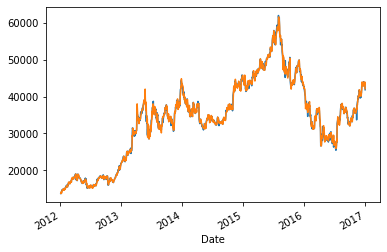

In [38]:
df['Close'].plot()
df['Open'].plot()

In [27]:
output_var = pd.DataFrame(df['Close'])
features = ['Open', 'High', 'Low', 'Volume']

In [28]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features,data=feature_transform,index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2016-12-30,0.593770,0.591938,0.596097,0.098141
2016-12-29,0.612168,0.610430,0.613916,0.064462
2016-12-28,0.631821,0.626013,0.629402,0.041849
2016-12-27,0.615095,0.620403,0.626644,0.054395
2016-12-26,0.618649,0.619572,0.625583,0.045663


In [29]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [30]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [45]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=True))
lstm.add(LSTM(50,activation='relu'))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 50)             11000     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31,251
Trainable params: 31,251
Non-trainable params: 0
_________________________________________________________________


In [46]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=4, verbose=2, shuffle=False)

Epoch 1/100
279/279 - 5s - loss: 1353095168.0000 - 5s/epoch - 16ms/step
Epoch 2/100
279/279 - 1s - loss: 1320574080.0000 - 907ms/epoch - 3ms/step
Epoch 3/100
279/279 - 1s - loss: 1181908736.0000 - 900ms/epoch - 3ms/step
Epoch 4/100
279/279 - 1s - loss: 915729152.0000 - 885ms/epoch - 3ms/step
Epoch 5/100
279/279 - 1s - loss: 583392640.0000 - 871ms/epoch - 3ms/step
Epoch 6/100
279/279 - 1s - loss: 285392032.0000 - 872ms/epoch - 3ms/step
Epoch 7/100
279/279 - 1s - loss: 98955392.0000 - 856ms/epoch - 3ms/step
Epoch 8/100
279/279 - 1s - loss: 23928068.0000 - 821ms/epoch - 3ms/step
Epoch 9/100
279/279 - 1s - loss: 5860883.5000 - 846ms/epoch - 3ms/step
Epoch 10/100
279/279 - 1s - loss: 3126186.0000 - 841ms/epoch - 3ms/step
Epoch 11/100
279/279 - 1s - loss: 2713066.5000 - 1s/epoch - 4ms/step
Epoch 12/100
279/279 - 1s - loss: 2550260.2500 - 1s/epoch - 5ms/step
Epoch 13/100
279/279 - 1s - loss: 2413617.2500 - 1s/epoch - 4ms/step
Epoch 14/100
279/279 - 1s - loss: 2277222.7500 - 859ms/epoch - 3ms/

In [47]:
y_pred= lstm.predict(X_test)

4/4 [==============================] - 0s 3ms/step


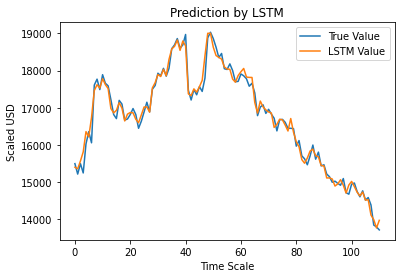

In [48]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [53]:
rmse = mean_squared_error(y_test,y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test,y_pred)

In [54]:
print('RSME:', rmse)
print('MAPE: ', mape)

RSME: 166.4223373758712
MAPE:  0.007288272262577867
